In [25]:
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import math

import cv2

<b>Funktion für die Darstellung von Bildern mit 'cv2.imshow'</b><br>

In [26]:
'''
show images with cv2.imshow:
:input img: image file
:input scale_percent: percentage input of the image size
:input figure_name: name of the figure
'''
def ShowImage(img, scale_percent, figure_name):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imshow(figure_name, resized)

<b>Bilddaten laden</b><br>

In [27]:
imgData = glob('images/hough_transformation/*.*')

In [28]:
imgData

['images/hough_transformation\\hsbi_gebaeude.jpg',
 'images/hough_transformation\\schueco_sonnenschutz.bmp',
 'images/hough_transformation\\xRaps.bmp',
 'images/hough_transformation\\x_schrauben.bmp']

<b>Bilddaten einlesen - 'cv2.imread'</b><br>

In [56]:
image = cv2.imread(imgData[3])

<b>Konvertierung von BGR zu RGB - 'cv2.cvtColor(image, cv2.COLOR_BGR2RGB)' und von BGR zu GRAY 'cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)'</b><br>

In [61]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<b>Biddatein darstellen/anzeigen</b><br>

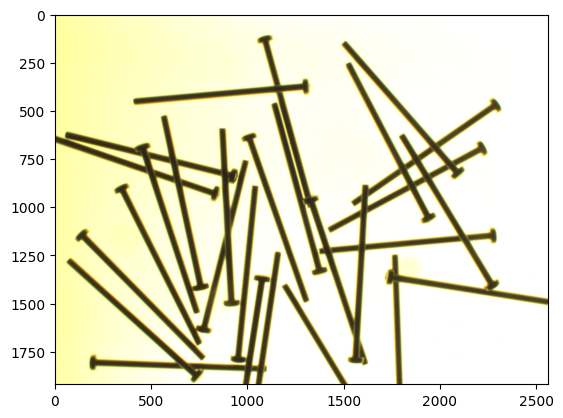

In [62]:
# image_rgb anzeigen: plt.imshow
plt.imshow(image_rgb)

# Alternative show image_gray: cv2.imshow
#ShowImage(image_gray, 50, 'image_rgb')
#cv2.waitKey(0)
#cv2.destroyWindow('image_rgb')

<b>Kantendetektor 'cv2.Canny' und Kantenbild anzeigen</b><br>

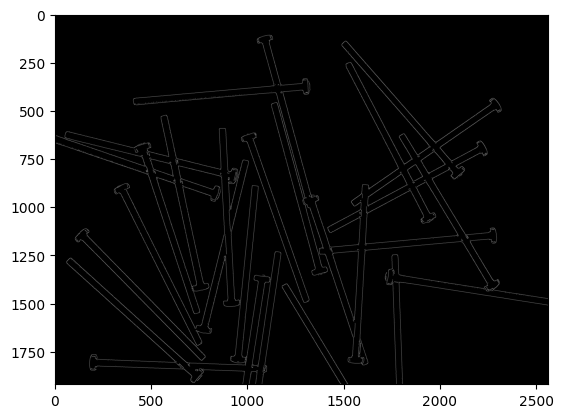

In [63]:
edges = cv2.Canny(image_gray,50,100)
plt.imshow(edges, cmap='gray')
#ShowImage(edges, 50, 'edges canny')
#cv2.waitKey(0)
#cv2.destroyWindow('edges canny')

<b>HoughCircles mit 'cv2.HoughLines' berechnen</b><br> 

In [66]:
# input - edges: Input image (grayscale).
# input - rho : The resolution of the parameter r in pixels. We use 1 pixel.
# input - theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
# input - threshold: The minimum number of intersections to "*detect*" a line
# output: lines: A vector that will store the parameters (r,θ) of the detected lines
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=250)

<b>Linien zeichnen und anzeigen</b><br>

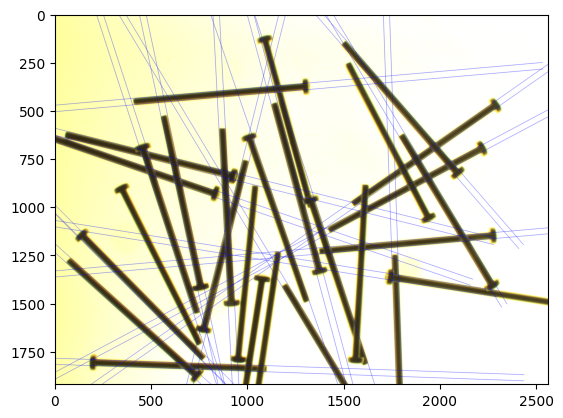

In [67]:
line_length = 2500
image_lines = image_rgb.copy()
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + line_length*(-b)), int(y0 + line_length*(a)))
        pt2 = (int(x0 - line_length*(-b)), int(y0 - line_length*(a)))
        # draw lines
        cv2.line(image_lines, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)


# image_rgb anzeigen: plt.imshow
plt.imshow(image_lines)
 
#ShowImage(image_rgb, 40, 'detected lines')
#cv2.waitKey(0)
#cv2.destroyWindow('detected lines')

<b>HoughLinesP mit 'cv2.HoughLinesP' berechnen</b><br> 

In [73]:
# Probabilistische Hough-Linien-Transformation: HoughLinesP
# input - edges: Input image (grayscale).
# input - rho: The resolution of the parameter r in pixels. We use 1 pixel.
# input - theta: The resolution of the parameter θ in radians. We use 1 degree (np.pi/180)
# input - threshold = The minimum number of intersections to "*detect*" a line
# input - minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
# input - maxLineGap: The maximum gap between two points to be considered in the same line.
# output - lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines.
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=150, minLineLength=250, maxLineGap=25)

<b>Linien zeichnen und anzeigen</b><br>

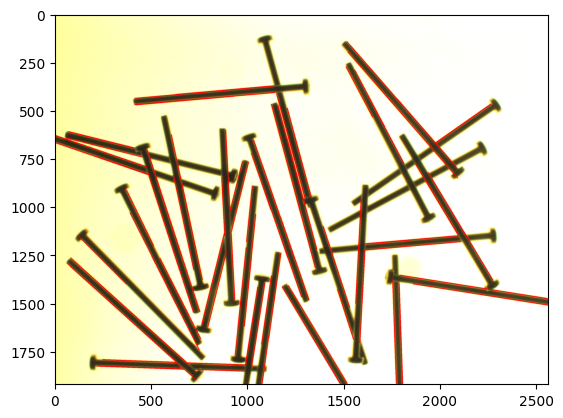

In [74]:
image_HoughLinesP = np.copy(image_rgb)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_HoughLinesP, (x1, y1), (x2, y2), (255, 0, 0), 3)

# image_rgb anzeigen: plt.imshow
plt.imshow(image_HoughLinesP)
 
#ShowImage(image_HoughLinesP, 40, 'detected lines - HoughLinesP')
#cv2.waitKey(0)
#cv2.destroyWindow('detected lines - image_HoughLinesP')